# AMIA 2016 Annual Symposium Workshop (WG13)

### Mining Large-scale Cancer Genomics Data Using Cloud-based Bioinformatics Approaches (RNAseq)

Riyue Bao, Ph.D. 
Center for Research Informatics,
The University of Chicago.
8:45 AM - 10:00 AM, November 13, 2016

***

## Objective

* **Introduction to RNAseq technology and clinical application** (10 minutes)
    * Learn the background and when to use RNAseq for your projects
* **How to perform RNAseq analysis** (50 minutes) *hands-on*
    * Learn the good-practice analysis protocol (**8 steps**)
        * From raw sequencing data to quantitative measures of transcripts (automated pipeline)
        * Identify differentially expressed genes (DEGs) between conditions and affected pathways
        * Generate high-quality figures for publication
* **Associate gene expression data with clincial outcome** (15 minutes) *hands-on*
    * Discover tumor subtypes and detect survival difference (**3 steps**)
    * The Cancer Genome Atlas (TCGA), hosted at NCI Genomics Data Commons (GDC)

<img src='notebook_ext/ipynb_data/assets/Figure24.png', title = 'RNAseq objective', width = 600, height = 600>

***

## Dataset
* **Data for RNAseq analysis**
    * Two groups (*PRDM11* KO vs WT, U2932 cells), 6 samples
    * Aim to identify DEGs / pathways altered between KO and WT groups
    * Fog. et al. 2015. [Loss of PRDM11 promotes MYC-driven lymphomagenesis](http://www.bloodjournal.org/content/125/8/1272.long?sso-checked=true). Blood 125(8):1272-81   

| Sample | Group | Sequencing File | Sequencing Data |
|------|------|------|------|------|   
| KO01 | KO | KO01.fastq.gz | 74,126,025 reads |   
| KO02 | KO | KO02.fastq.gz | 64,695,948 reads |   
| KO03 | KO | KO03.fastq.gz | 52,972,573 reads |   
| WT01 | WT | WT01.fastq.gz | 55,005,729 reads |   
| WT01 | WT | WT02.fastq.gz | 61,079,377 reads |   
| WT01 | WT | WT03.fastq.gz | 66,517,156 reads |  

* **Data for clinical association**
    * TCGA ovarian cancer, 379 primary tumors
    * Aim to use microRNA expression to group patients into subtypes and detect survival differences
    * The Cancer Genome Atlas Research Network. 2011. [Integrated genomic analyses of ovarian carcinoma](http://www.nature.com/nature/journal/v474/n7353/full/nature10166.html). Nature 474, 609–615
<img src='notebook_ext/ipynb_data/assets/Figure23.png', title = 'TCGA datasets', width = 600, height = 600>

***

## 1. RNAseq technology, clinical application and data analysis

### 1.1 What is RNAseq

* **High-throughput sequencing of RNA: Profile, identify or assemble transcripts**
    * Detect gene / isoform expression changes between conditions
    * Identify novel splice sites / exons, mutations, fusion genes, etc.
    * Broad detection range (lowly to highly expressed genes), high sensitivity, low requirement of RNA amount
    * Available for all species (reference genome is optional): reference genome-guided alignment or *de novo* assembly
    * Transcriptome-wide approach for quantitative measurements and gene discovery without prior knowledge
<img src='notebook_ext/ipynb_data/assets/Figure14.png', title = 'A typical RNAseq experiment', width = 800, height = 400>
* **RNAseq cannot answer**
    * Transcription factor binding sites / histone modification on the genome (ChIPseq)
    * DNA/histone methylation changes (Methylated DNA immunoprecipitation sequencing (MeDIPseq), Bisulfite sequencing)
    * Genomic DNA changes (Whole genome/exome sequencing (WGS/WXS), targeted panel DNAseq)
    * Chromatin interactions (5C, 7C)
    * Protein / peptide identification and quantification (isobaric peptide labelling approach (iTRAQ))
* **Experimental Design** ([considerations and limitations](https://github.com/riyuebao/CRI-Workshop-Nov2016-RNAseq/tree/master/notebook_ext/ipynb_data/assets/Figure13.png))
<img src='notebook_ext/ipynb_data/assets/Figure15.png', title = 'Biological replicates', width = 400, height = 400>

### 1.2 Clinical applications 
* Discover gene signature that predicts patient's clinical outcome
* Detect gene fusions in tumor samples as causal genomic aberrations for disease
* Integrate with other types of genomic data (e.g. ChIPseq, miRNAseq) to identify tumor types
* Challenges and limitations
    * Relatively poor RNA quality for tumor FFPE samples
    * Contamination from adjacent normal tissue
    * Still more expensive than targeted-panel sequencing such as NanoString
    * 40 million mapped reads are usually sufficient for gene profiling, but > 80 m are required to detect bottom 1% lowly expressed genes
* **TCGA datasets** (35 cancer types, > 20,000 tumor/normal samples, > 9,000 patients)
<img src='notebook_ext/ipynb_data/assets/Figure17.png', title = 'TCGA OV Nature paper', width = 600, height = 90>

***

## 2. How to perform RNAseq analysis

<img src='notebook_ext/ipynb_data/assets/Figure20.png', title = 'RNAseq analysis', width = 800, height = 400>

### Workflow 

The best-practice analysis protocol takes 8 major steps. For a more detailed description, refer to the extended version of notebooks (`notebook_ext/02.Run_RNAseq.tutorial.ipynb`).

* Steps 1-4: From raw sequencing to transcript quantification is **automated through [BigDataScript](https://pcingola.github.io/BigDataScript/) (BDS) pipeline**.
* Steps 5-8: DEG and pathway analysis will be practiced **interactively to better interpret the results**.

<img src='notebook_ext/ipynb_data/assets/Figure25.png', title = 'RNAseq workflow', width = 900, height = 900>

Due to time limit, we will not run the BDS pipeline in this workshop. Since it is automated, participants are encouraged to practice it post-workshop following the instructions at [Github](https://github.com/riyuebao/CRI-Workshop-Nov2016-RNAseq). The launching of the pipeline only requires submission of one script `Build_RNAseq.sh`, which was already prepared for you. The pipeline was designed to **take care of all the dependencies between tasks/jobs with robust checkpoints and high reproducibility**. 

### Steps 1-4

### 2.3.1 - 2.3.2 Quality assessment and preprocessing of raw sequencing reads

* **Raw sequencing reads** are stored in FastQ format (e.g. `KO01.fastq.gz`), where each read is presented by 4 lines
<img src='notebook_ext/ipynb_data/assets/Figure10.png', title = 'Sequencing reads in FastQ format', width = 600, height = 90>
* QC produces reports that help you evaluate if a sequencing run is successful and if reads are of high quality ([example](https://github.com/riyuebao/CRI-Workshop-Nov2016-RNAseq/tree/master/notebook_ext/ipynb_data/assets/multiqc_report.html))
* *Optional* Preprocess reads to improve mapping rate and accuracy (in the next step, 1.3.3)
    * Trim low-quality bases, clip adapters, etc.
    * Avoid overtrimming in RNAseq! ([Williams et al. 2016](http://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-016-0956-2))

### 2.3.3 - 2.3.4 Map reads to reference genome and quantification of transcript abundance
* Read mapping identifies the location in the genome where a sequencing read comes from
* Accurate mapping result is the key for quantification and DEG identification
* **splice-aware aligner** (e.g. [STAR](https://github.com/alexdobin/STAR))
<img src='notebook_ext/ipynb_data/assets/Figure12.png', title = 'RNAseq mapping result', width = 600, height = 400>
* **Different aligners may generate very different results** ([Engström et al. 2013](http://www.nature.com/nmeth/journal/v10/n12/full/nmeth.2722.html))

### RNAseq metrics
* Collect metrics to evaluate RNA sample quality and identify potential problems ([example](https://github.com/riyuebao/CRI-Workshop-Nov2016-RNAseq/tree/master/notebook_ext/ipynb_data/assets/multiqc_report.html))
    * **Is there high-level genomic DNA contamination?**
    * Is the RNA highly degraded?
    * Was ribosome RNA sucessfully depleted during library prep?
    * How do reads distribute on the genome? (exons, introns, intergenic, etc.)
    * Is the strandness of read alignment consistent with library type? (non-stranded or forward/reverse strand-specific)
    * Does the target gene knocked down in KO samples have reduced expression as expected?
<blockquote>
Which sample (S1-4) has the most severe contamination from genomic DNA?   
Hint: higher percentage of intergenic reads indicates more severe DNA contamination in RNA samples
</blockquote>
<img src='notebook_ext/ipynb_data/assets/Figure5.png', title = 'Figure5', width = 600, height = 600>
*For answers to other questions, refer to the extended version of notebooks* (`notebook_ext/02.Run_RNAseq.tutorial.ipynb`)

### Steps 5-8

* From the pipeline run, we generated read alignment and counts for every annotated gene on the genome
* The next step is to utilize the read counts data to detect DEGs
* For example, if we visualize *FOS* gene across 6 samples in genome browser (e.g. [IGV](http://software.broadinstitute.org/software/igv/))

<img src='notebook_ext/ipynb_data/assets/Figure16.png', title = 'KO vs WT read coverage FOS', width = 600, height = 600>

### 2.3.5 - 2.3.7 Normalize gene expression and identify DEGs: DESeq2

Involves five sub-steps in [R](https://www.r-project.org/about.html) (i to v).

* **To systematically identify significant DEGs across the transcriptome, we will use [DESeq2](http://bioconductor.org/packages/release/bioc/html/DESeq2.html)**
* Different tools (`edgeR`, `limmavoom`) may have very different performance! [Seyednasrollah F et al. 2015](https://dx.doi.org/10.1093/bib/bbt086)
* We will also practice how to generate publication-quality figures such as PCA, heatmap, clustering, and pathways from our data

**Good coding practice**
* One statement each line for clarity. It is possible to concatenate statements with `;` but not recommended
* Break long statements into multiple lines with less than 80 column per line for better readability!

### i. Prepare working environment and set up parameters
* Set up global variables at the beginning, avoid hard-coding of file names, directories, etc.
* Can easily apply to other projects with similar experimental design

In [1]:
##-- Clean the environment: always run this before starting new analysis!
rm(list=ls())

##-- Load libraries required in this analysis
pkg.list = c('ggplot2', 'RColorBrewer', 'reshape',
             'DESeq2', 'vsn', 'genefilter', 'pheatmap',
             'clusterProfiler', 'pathview', 'IRdisplay')
for(pkg in pkg.list) {
    suppressMessages(require(pkg, character.only = TRUE))
}

##-- Parameters
cancer = 'DLBC' 
fdr = 0.05
fc = 1.5
gene.type = 'coding'
caller = 'deseq2'
group1 = 'KO'
group2 = 'WT'
colors = c('#CC0000', '#00CC00')

##-- Set up working directory
work.dir = '.'
setwd(work.dir)

##-- Input/Output directories
in.dir = 'notebook_ext/ipynb_data/input'
out.dir = 'notebook_ext/ipynb_data/output'

##-- Input/Output files
expr.file = paste0(cancer, '.raw_counts.coding.tsv')
sample.file = paste0(cancer, '.sample_group.tsv')

##-- Print analysis info
print(paste0('Cancer = ', cancer))
print(paste0('gene type = ', gene.type))
print(paste0('DEG fdr cutoff = ', fdr))
print(paste0('DEG fc cutoff = ', fc))
print(paste0('Expression file = ', expr.file))
print(paste0('Sample group file  = ', sample.file))

[1] "Cancer = DLBC"
[1] "gene type = coding"
[1] "DEG fdr cutoff = 0.05"
[1] "DEG fc cutoff = 1.5"
[1] "Expression file = DLBC.raw_counts.coding.tsv"
[1] "Sample group file  = DLBC.sample_group.tsv"


### ii. Import data
* Read counts on coding genes 
* Sample groups

In [2]:
##-- Read data files
data.expr = read.delim(paste0(in.dir, '/', expr.file), header=T, stringsAsFactors=F)
data.sample = read.delim(paste0(in.dir, '/', sample.file), header=T, stringsAsFactors=F)

data.expr[1:3,]
data.sample

ENSEMBL,SYMBOL,KO01,KO02,KO03,WT01,WT02,WT03
ENSG00000000003.14,TSPAN6,3,1,4,0,0,0
ENSG00000000005.5,TNMD,0,0,0,0,0,0
ENSG00000000419.12,DPM1,3197,2318,1356,2630,2735,2721


Sample,Group
KO01,KO
KO02,KO
KO03,KO
WT01,WT
WT02,WT
WT03,WT


### iii. Principle Component Analysis (PCA) and biological replicate correlation
* Both are good assessment to identify mislabeled samples and outliers
* All genes are used as input!
* PCA - do samples group as expected? 
* Correlation - do biological replicates correlate with each other? 

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”

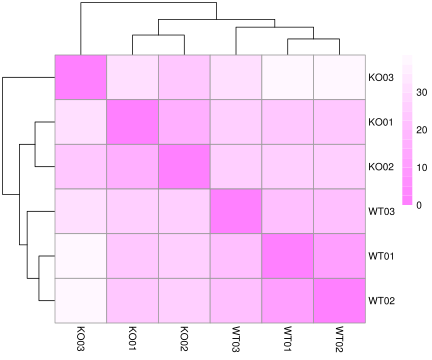

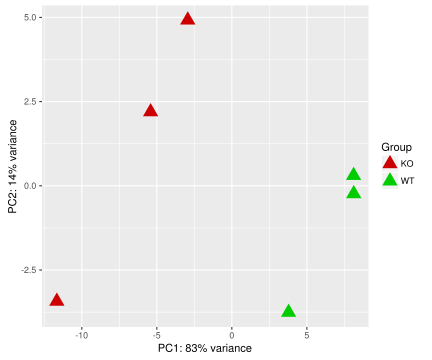

In [3]:
out.prefix = paste0(out.dir, '/', caller, '/',cancer,'.', 
                    gene.type, '.', caller)

##-- Set up R plot display options in notebook
options(jupyter.plot_mimetypes = "image/svg+xml") 
options(repr.plot.width = 6, repr.plot.height = 5)

##-- Process expression matrix
row.names(data.expr) = data.expr$ENSEMBL
data.expr.proc = data.expr[,-c(1:2)]
data.expr.proc = data.expr.proc[,data.sample$Sample]
Group = as.factor(data.sample$Group)

##-- DESeq2: build DESeqDataSet object, prepare design matrix
dds = DESeqDataSetFromMatrix(countData = as.matrix(data.expr.proc),
                             colData = data.sample, 
                             design = ~ Group)

##-- DESeq2: normalize matrix for clustering/heatmap generation
vsd = varianceStabilizingTransformation(dds, blind=FALSE)

##-- DESeq2: sample correlation heatmap
sampleDists = dist(t(assay(vsd)))
sampleDistMatrix = as.matrix(sampleDists)
rownames(sampleDistMatrix) = vsd$Sample
colnames(sampleDistMatrix) = rownames(sampleDistMatrix)
heatmap.colors = rev(cm.colors(32))[1:16]
pheatmap(sampleDistMatrix,
       clustering_distance_rows=sampleDists,
       clustering_distance_cols=sampleDists,
       col=heatmap.colors)

##-- DESeq2: Principal component analysis (PCA) plot
data.pca = plotPCA(vsd, intgroup=c('Group'), returnData=TRUE)
percent.var = round(100 * attr(data.pca, "percentVar"))
pca.colors = c(KO = colors[1], WT = colors[2])
p1 = ggplot(data.pca, aes(PC1, PC2, color = Group)) +
            geom_point(size = 5, shape = 17) +
            scale_colour_manual(values = pca.colors) + 
            xlab(paste0("PC1: ",percent.var[1],"% variance")) +
            ylab(paste0("PC2: ",percent.var[2],"% variance"))
plot(p1)

### iv. Normalize and detect DEGs
* Normalize read counts and fit a linear model
* Lowly expressed genes are automatically filtered out (default as mean read counts < 10)
* Estimate the **KO vs WT** fold-change and p-values for each gene 

In [4]:
##-- Set up R plot display options in notebook
options(jupyter.plot_mimetypes = "image/svg+xml") 
options(repr.plot.width = 6, repr.plot.height = 5)

print(paste0('Group 1 = ', group1))
print(paste0('Group 2 = ', group2))
comp = paste0(group1, 'vs', group2, '.')
out.prefix = paste0(out.dir, '/', caller,'/',cancer,'.',
                    gene.type, '.',comp, caller,'.txt')

##-- DESeq2: fit the model and identify DEGs
dds = DESeq(dds, test="Wald", betaPrior=T)
res = results(dds, 
              contrast=c("Group",group1,group2), 
              pAdjustMethod ="fdr", 
              alpha=fdr)

##-- DESeq2: peek into DEG data object
summary(res)
res = as.data.frame(res)

##-- DESeq2: add fold change (via anti-log log2FC)
res$foldChange = NA
row_pos = which(! is.na(res$log2FoldChange) & 
                res$log2FoldChange >= 0)
row_neg = which(! is.na(res$log2FoldChange) & 
                res$log2FoldChange < 0)
res$foldChange[row_pos] = 2^res$log2FoldChange[row_pos]
res$foldChange[row_neg] = -2^((-1) * res$log2FoldChange[row_neg])
res = data.frame(id = row.names(res), res)
# print(sum(res$foldChange == 0) == 0)

##-- DESeq2: add gene symbol back
res.print = res
colnames(res.print)[1] = 'ENSEMBL'
res.print = merge(data.expr[,1:2], res.print, by = 'ENSEMBL')

res.print[1:3,]

[1] "Group 1 = KO"
[1] "Group 2 = WT"


estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing



out of 16790 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)     : 1010, 6% 
LFC < 0 (down)   : 1038, 6.2% 
outliers [1]     : 1, 0.006% 
low counts [2]   : 4190, 25% 
(mean count < 10)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



ENSEMBL,SYMBOL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,foldChange
ENSG00000000003.14,TSPAN6,1.449331,0.1551665,0.08359604,1.856147,0.06343258,NA,1.113550
ENSG00000000005.5,TNMD,0.000000,NA,NA,NA,NA,NA,NA
ENSG00000000419.12,DPM1,2427.048731,-0.2017824,0.12436288,-1.622529,0.10469004,0.2767594,-1.150118


### v. Filter for significant DEGs and plot heatmap
* Filter for significant DEGs with at least 1.5 fold-change and FDR-adjusted p-value < 0.05
* Generate expression heatmap on significant DEGs (different from PCA and correlation heatmap described in iii)

[1] "Genes removed = 7245 (fold change is NA)"
[1] "Genes kept = 12599"
[1] "Filter DEGs by: fc, 1.5, fdr 0.05"
[1] "Genes non-significant = 12303 (fc, 1.5, fdr 0.05)"
[1] "Genes significant = 296"


,id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,foldChange
ENSG00000006282.20,ENSG00000006282.20,339.1868,-0.6129525,0.1144608,-5.355130,8.549488e-08,4.766150e-06,-1.529386
ENSG00000007944.14,ENSG00000007944.14,498.9798,-0.8249904,0.1084094,-7.609956,2.741897e-14,7.050033e-12,-1.771523
ENSG00000019549.8,ENSG00000019549.8,143.4191,0.6002812,0.1529813,3.923886,8.713192e-05,1.596681e-03,1.516012


[1] "Heatmap = 296 genes on the row, 6 samples on the column"


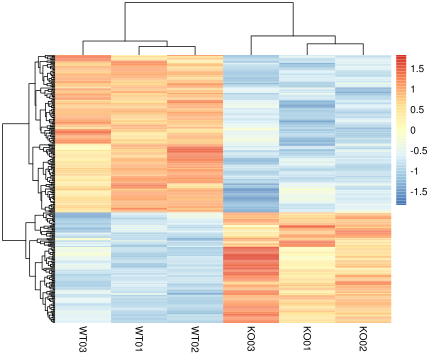

In [5]:
##-- Set up R plot display options in notebook
options(jupyter.plot_mimetypes = "image/svg+xml") 
options(repr.plot.width = 6, repr.plot.height = 5)

##-- DESeq2: remove nan values for the foldchange == NAN
before = nrow(res)
res = res[!is.na(res$foldChange) & ! is.na(res$padj),];
after = nrow(res)
print(paste0('Genes removed = ', (before - after), 
             ' (fold change is NA)'))
print(paste0('Genes kept = ', after))
print(paste0('Filter DEGs by: fc, ', fc, ', fdr ', fdr))

##-- DESeq2: filter DEGs
res.flt = res[(res$foldChange >= fc | res$foldChange <= -fc) & 
              res$padj < fdr,]
print(paste0('Genes non-significant = ', (after - nrow(res.flt)), 
             ' (fc, ', fc, ', fdr ', fdr, ')'))
print(paste0('Genes significant = ', nrow(res.flt)))

##-- DESeq2: peek into filtered gene list
res.flt[1:3,]
res.flt.print = res.print[res.print$ENSEMBL %in% res.flt$id,]

##-- DESeq2: select those sig genes from normalized expression matrix
gene.select = res.flt$id
data.plot = assay(vsd)
data.plot = data.plot[row.names(data.plot) %in% gene.select,,
                      drop = FALSE]

##-- DESeq2: plot sig DEG heatmap
print(paste0('Heatmap = ', nrow(data.plot), ' genes on the row, ', 
             ncol(data.plot), ' samples on the column'))
pheatmap(data.plot,
         scale = 'row',
         cluster_rows = TRUE, cluster_cols = TRUE,
         show_rownames = FALSE, show_colnames = TRUE,
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean", 
         clustering_method = "complete",
        )

### 2.3.8 Identify enriched GO and pathways: clusterProfiler
* Gene Ontology bological processes and KEGG pathways
* Enrichment in significant DEGs

'select()' returned 1:many mapping between keys and columns
Warning message in bitr(geneID = genes.all$SYMBOL, fromType = "SYMBOL", toType = c("ENTREZID"), :
“0.9% of input gene IDs are fail to map...”

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue
GO:1902105,GO:1902105,regulation of leukocyte differentiation,17/266,152/10989,1.482200e-07,0.0002654608,0.0002199212
GO:1903706,GO:1903706,regulation of hemopoiesis,20/266,210/10989,1.713203e-07,0.0002654608,0.0002199212
GO:0002761,GO:0002761,regulation of myeloid leukocyte differentiation,11/266,69/10989,7.151402e-07,0.0007387398,0.0006120095


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
hsa05322,hsa05322,Systemic lupus erythematosus,12/140,70/4592,9.399456e-07,0.0001992685,0.0001919468,8347/8343/8339/8970/8358/8357/8356/8367/8365/8349/440689/7124,12
hsa01212,hsa01212,Fatty acid metabolism,7/140,45/4592,3.624430e-04,0.0300220377,0.0289189439,39/23205/79071/3992/9415/51144/6319,7
hsa01040,hsa01040,Biosynthesis of unsaturated fatty acids,5/140,22/4592,4.248402e-04,0.0300220377,0.0289189439,79071/3992/9415/51144/6319,5


'select()' returned 1:1 mapping between keys and columns
Info: Working in directory /home/ubuntu/dev/rnaseq/CRI-Workshop-Nov2016-RNAseq
Info: Writing image file hsa04010.gene_all.pathview.png


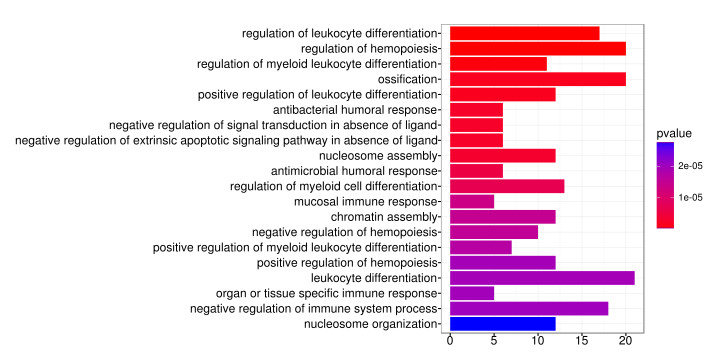

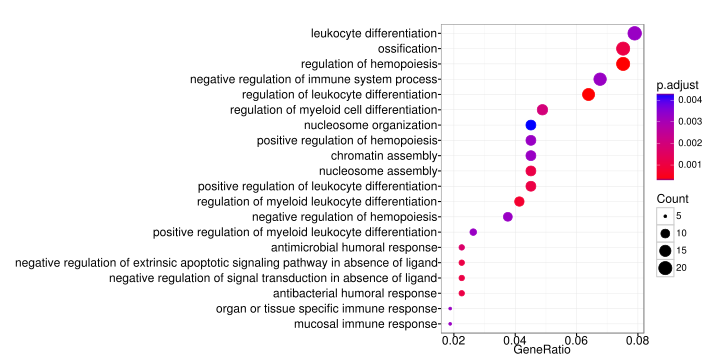

In [6]:
##-- clusterProfiler: NOTE those commands were tested for clusterProfiler 
##-- version 3.0.5 or above. Older versions may not work as they have 
##-- options revised/removed in the new versions.

##-- clusterProfiler: prepare input for GO/KEGG enrichment analysis
genes.all = res.print
genes.sig = res.flt.print

##-- clusterProfiler: remove genes with fc / pvalue as NA
genes.all = na.omit(genes.all)

##-- clusterProfiler: add EntrezID, fc and p-value
# keytypes(org.Hs.eg.db) 
genes.all.anno = bitr(geneID   =  genes.all$SYMBOL, 
                      fromType = 'SYMBOL', 
                      toType   = c('ENTREZID'), 
                      OrgDb    = 'org.Hs.eg.db', 
                      drop     = TRUE)
genes.all.anno = merge(genes.all.anno, genes.all, by = 'SYMBOL')
genes.all.anno = genes.all.anno[
    which(! duplicated(genes.all.anno$ENTREZID)), ]
row.names(genes.all.anno) = genes.all.anno$ENTREZID
genes.sig.anno = genes.all.anno[genes.all.anno$SYMBOL %in% 
                                genes.sig$SYMBOL,]

##-- clusterProfiler: GO over-representation test
##-- takes ~2 minutes .. skip in workshop!
# ego = enrichGO( gene          = genes.sig.anno$ENTREZID,
#                 universe      = genes.all.anno$ENTREZID,
#                 OrgDb         = 'org.Hs.eg.db',
#                 ont           = "BP",
#                 pAdjustMethod = "fdr",
#                 pvalueCutoff  = 0.05,
#                 readable      = TRUE)
##-- instead, load already generated output
load(paste0(out.prefix, '.flt.fdr', fdr,'_fc',fc, '.enrichGO.RData'))
summary(ego)[1:3,1:7]

##-- Set up R plot display options in notebook
options(jupyter.plot_mimetypes = "image/svg+xml") 
options(repr.plot.width = 10, repr.plot.height = 5)

##-- clusterProfiler: KEGG over-representation test
##-- takes ~2 minutes .. skip in workshop!
# kk =  enrichKEGG(gene          = genes.sig.anno$ENTREZID,
#                  universe      = genes.all.anno$ENTREZID,
#                  organism      = "human",
#                  pAdjustMethod = "fdr",
#                  pvalueCutoff  = 0.05)
##-- instead, load already generated output
load(paste0(out.prefix, '.flt.fdr', fdr,'_fc',fc,'.enrichKEGG.RData'))
summary(kk)[1:3,]

##-- clusterProfiler: visualize pathway with all genes
gene.list = genes.all.anno$foldChange
names(gene.list) = genes.all.anno$ENTREZID
pathway = 'hsa04010'
plot.title = paste0(pathway, '.gene_all.pathview.png')
p4 = pathview(gene.data  = gene.list,
              pathway.id = pathway,
              species    = "human",
              limit      = list(gene=4, cpd=1),
              kegg.dir   = paste0(out.dir,'/',caller),
              out.suffix = paste0('gene_all.pathview'))

##-- clusterProfiler: visualization of GO and KEGG enrichment results
barplot(ego, showCategory=20)
dotplot(ego, showCategory=20)

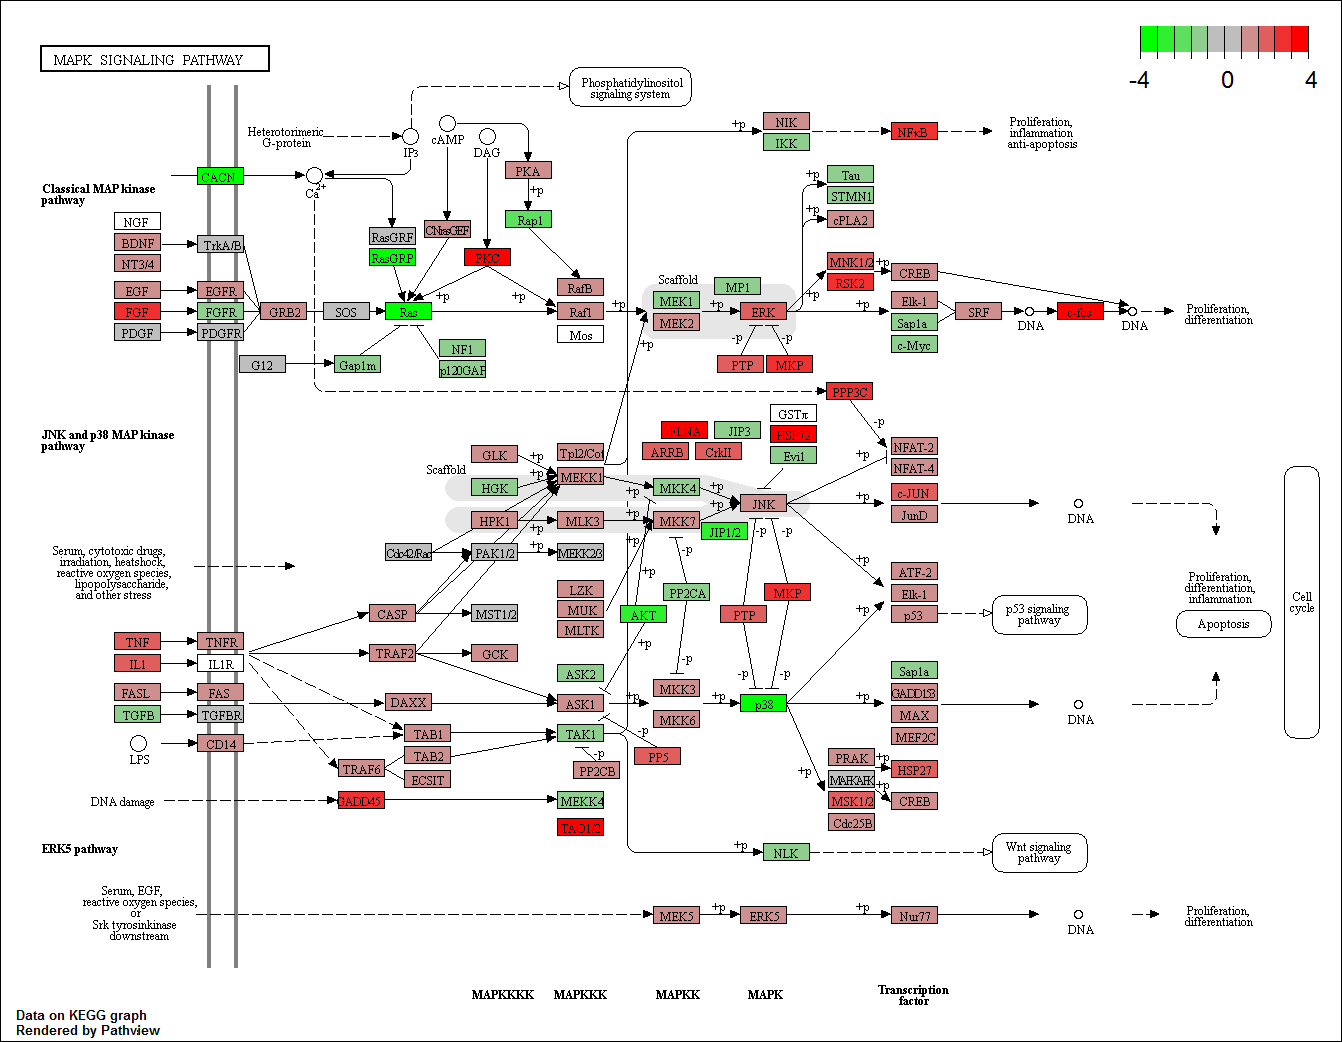

In [7]:
display_png(file='notebook_ext/ipynb_data/assets/hsa04010.gene_all.pathview.png')

***

## 3. Practice how to associate gene expression with clincial data 

* TCGA hosted on GDC (https://gdc-portal.nci.nih.gov)
<img src='notebook_ext/ipynb_data/assets/Figure19.png', title = 'GDC website', width = 800, height = 200>
* **Our data**
    * ~500 Ovarian Cancer patients (expression and clinical)
<img src='notebook_ext/ipynb_data/assets/Figure18.png', title = 'TCGA OV Nature paper', width = 800, height = 200>

### Workflow 

The analysis takes 3 major steps. For a more detailed description, refer to the extended version of notebooks (notebook_ext/04.Run_RNAseq.tutorial.ipynb).

<img src='notebook_ext/ipynb_data/assets/Figure26.png', title = 'TCGA & Clinical workflow', width = 900, height = 900>

### 3.1 - 3.2. Import data, normalize expression and cluster patients based on expression profile

Involves two sub-steps in [R](https://www.r-project.org/about.html) (i to ii).
### i. Select the top 150 most variable genes and run clustering

In [8]:
##-- Clean up environment
rm(list=ls())
set.seed(13)

##-- Load libraries required in this analysis
pkg.list = c('ggplot2', 'RColorBrewer', 'reshape',
             'gplots', 'survival', 'NMF', 'IRdisplay')
for(pkg in pkg.list) {
    suppressMessages(require(pkg, character.only = TRUE))
}

##-- Parameters
cancer = 'OV' 
gene.top.count = 150

##-- Set up working directory
work.dir = '.'
setwd(work.dir)

##-- Input/Output directories
in.dir = 'notebook_ext/ipynb_data/input'
out.dir = 'notebook_ext/ipynb_data/output/tcga_ov'

##-- Input/Output files
expr.file = paste0('TCGA_', cancer, '.mirna_expression.tsv')
clinical.file = paste0('TCGA_', cancer, '.clinical.tsv')

##-- Print analysis info
print(paste0('Cancer = ', cancer))
print(paste0('Expression file = ', expr.file))
print(paste0('Clinical file  = ', clinical.file))

##-- Read files
expr = read.delim(paste0(in.dir,'/',expr.file), 
                       header = T, stringsAsFactors = F)
clinical = read.delim(paste0(in.dir,'/',clinical.file), 
                           header = T, stringsAsFactors = F)

print(paste0('Patients with clincial = ', nrow(clinical)-1))
print(paste0('Patients with expression = ', ncol(expr)-1))
print(paste0('Overlap = ', length(intersect(clinical$sample, 
                                      colnames(expr)))))
clinical[1:3,]
expr[1:3,]

##-- Preprocess row.names(clinical) = clinical[,1]
row.names(expr) = expr[,1]
expr = as.matrix(expr[,-1])

##-- median-centered normalization by gene (for NMF clustering only!)
expr.centered = t(apply(expr,1,function(x){x-median(x)}))

##-- calculate variance: MAD
expr.var = data.frame(mad = apply(expr.centered,1,mad))

##-- sort gene by MAD values (higher to lower) 
expr.var = expr.var[rev(order(expr.var[,1])),,drop=F]

print(paste0('Calcuate and sort gene by Median absolute deviation (MAD):'))
head(expr.var)

##-- select 150 most variable genes 
expr.var.top = expr.var[1:gene.top.count,,drop=F]
gene.top = data.frame(gene = row.names(expr.var.top))

print(paste0('Select top ', gene.top.count,' most variable genes: e.g.'))

##-- subset expression matrix by genes and samples
expr.sub = expr.centered[row.names(expr.centered) %in% 
                              gene.top$gene,colnames(expr.centered) %in% 
                              clinical$sample]

##-- make clinical samples consistent with expression 
clinical = clinical[clinical$sample %in% 
                              colnames(expr.sub),]

##-- convert expression matrix to rank matrix (Important for NMF!)
##-- because no negative values are allowed in the matrix
expr.sub = apply(expr.sub,2,rank) / gene.top.count

print(paste0('Expression matrix ready for NMF clustering: ', 
       nrow(expr.sub), ' genes, ', 
       ncol(expr.sub), ' samples'))

##-- run NMF (use 4 core 'p4', and print more info 'v')
##-- takes 5 minutes to run... skip in workshop
# expr.sub.nmf = nmf(expr.sub, 
#                    rank = 3, 
#                    method = 'brunet', 
#                    seed = 'random', 
#                    nrun = 100, 
#                    .opt = 'vp4') 
##-- workshop only: load already generated result
load(paste0(out.dir,'/',expr.file,'.nmf.RData'))
expr.sub.nmf=expr.sub.nmf

##-- retrieve the basis matrix and coef matrix 
expr.sub.nmf.w = basis(expr.sub.nmf)
expr.sub.nmf.h = coef(expr.sub.nmf)

##-- retrieve gene cluster
expr.sub.nmf.geneclr = predict(expr.sub.nmf, 'features')
expr.sub.nmf.geneclr = data.frame(gene = row.names(expr.sub.nmf.w), 
                                  cluster = expr.sub.nmf.geneclr)
row.names(expr.sub.nmf.geneclr) = expr.sub.nmf.geneclr$gene
expr.sub.nmf.geneclr = expr.sub.nmf.geneclr[
    order(expr.sub.nmf.geneclr$cluster),]
table(expr.sub.nmf.geneclr$cluster)
head(expr.sub.nmf.geneclr)

##-- retrieve sample cluster
expr.sub.nmf.smclr = predict(expr.sub.nmf)
expr.sub.nmf.smclr = data.frame(sample = colnames(expr.sub.nmf.h), 
                                cluster = expr.sub.nmf.smclr)
row.names(expr.sub.nmf.smclr) = expr.sub.nmf.smclr$sample
expr.sub.nmf.smclr = expr.sub.nmf.smclr[
    order(expr.sub.nmf.smclr$cluster),]
table(expr.sub.nmf.smclr$cluster)
head(expr.sub.nmf.smclr)

##-- add sample cluster to clinical table
clinical = merge(clinical, expr.sub.nmf.smclr, by = 'sample')
clinical$cluster = as.numeric(clinical$cluster)
clinical = clinical[order(clinical$cluster),]

[1] "Cancer = OV"
[1] "Expression file = TCGA_OV.mirna_expression.tsv"
[1] "Clinical file  = TCGA_OV.clinical.tsv"
[1] "Patients with clincial = 487"
[1] "Patients with expression = 594"
[1] "Overlap = 486"


sample,vital.status,overall.survival.month,age.at.diagnosis.year,tumor.stage,tumor.grade
TCGA.61.1895,LIVING,1.54,52.21,IIIB,G3
TCGA.13.1510,LIVING,2.56,62.21,IIIC,G3
TCGA.23.1809,LIVING,0.52,63.32,IIC,G3


gene,TCGA.01.0628,TCGA.01.0630,TCGA.01.0631,TCGA.01.0633,TCGA.01.0636,TCGA.01.0637,TCGA.01.0639,TCGA.01.0642,TCGA.04.1331,⋯,TCGA.61.2104,TCGA.61.2109,TCGA.61.2110,TCGA.61.2111,TCGA.61.2113,TCGA.61.2610,TCGA.61.2611,TCGA.61.2612,TCGA.61.2613,TCGA.61.2614
DARKCORNER,4.858349,4.803304,4.590440,4.880881,4.819979,4.853715,4.940582,4.906301,4.781786,⋯,4.589702,4.586568,4.673449,4.660695,4.689072,4.767147,4.943472,4.721890,4.807852,4.709782
DMR_285,9.768374,6.771561,5.180863,7.206893,8.603105,7.212260,10.156701,10.250804,10.016083,⋯,8.760879,9.225761,9.789049,10.154137,8.433176,8.674735,8.014362,8.421691,7.482703,8.653586
DMR_3,10.799077,9.428824,10.966923,10.400447,9.602506,9.670999,10.636672,10.639728,10.506043,⋯,9.527405,10.078701,10.133914,10.704894,8.716315,7.770935,8.531603,9.173885,7.979668,8.866476


[1] "Calcuate and sort gene by Median absolute deviation (MAD):"


,mad
HSA-MIR-205,2.682480
HSA-MIR-449A,2.389007
HSA-MIR-31,1.809768
HSA-MIR-224,1.665024
HSA-MIR-451,1.628922
HSA-MIR-10A,1.481135


[1] "Select top 150 most variable genes: e.g."
[1] "Expression matrix ready for NMF clustering: 150 genes, 486 samples"



 1  2  3 
45 75 30 

,gene,cluster
HSA-MIR-205,HSA-MIR-205,1
HSA-MIR-494,HSA-MIR-494,1
HSA-MIR-144,HSA-MIR-144,1
HSA-MIR-142-5P,HSA-MIR-142-5P,1
HSA-MIR-181A,HSA-MIR-181A,1
HSA-MIR-151-3P,HSA-MIR-151-3P,1



  1   2   3 
155 211 120 

,sample,cluster
TCGA.04.1331,TCGA.04.1331,1
TCGA.04.1338,TCGA.04.1338,1
TCGA.04.1341,TCGA.04.1341,1
TCGA.04.1343,TCGA.04.1343,1
TCGA.04.1348,TCGA.04.1348,1
TCGA.04.1362,TCGA.04.1362,1


### ii. Generate gene-based and sample-based correlation heatmaps (Figure 4C in the paper)

* The plotting takes ~2 minute and lots of memory
* In this workshop, we will not run the code, but directly visualize the already generated plots
* The code to generate those heatmaps is provided below, if you want to try after the workshop

<img src='notebook_ext/ipynb_data/assets/Figure22.png', title = 'NMF heatmap', width = 600, height = 600>

In [9]:
##-- prepare for plotting heatmaps
gene.counts = data.frame(table(expr.sub.nmf.geneclr$cluster))
gene.colors = c(rep('pink',gene.counts[1,2]),
                rep('purple',gene.counts[2,2]),
                rep('lightgreen',gene.counts[3,2]))
sample.counts = data.frame(table(expr.sub.nmf.smclr$cluster))
sample.colors = c(rep('red',sample.counts[1,2]),
                  rep('blue',sample.counts[2,2]),
                  rep('green',sample.counts[3,2]))

##-- calculate expression correlation between samples
expr.sub.srt = expr.sub[,clinical$sample]
expr.sub.srt = expr.sub.srt[row.names(expr.sub.srt) %in% 
                            expr.sub.nmf.geneclr$gene,]
expr.sub.srt = expr.sub.srt[as.character(expr.sub.nmf.geneclr$gene),]
expr.sub.cor = cor(expr.sub.srt)

##-- plot correlation heatmap (skip in workshop)
my.heatcol = bluered(177) 
my.breaks = sort(unique(c(seq(-1, -0.5, length.out=20),
                          seq(-0.5, 0.5, length.out=140),
                          seq(0.5, 1, length.out=20))))
centered = t(scale(t(expr.sub.cor), scale=F))
# heatmap = heatmap.2(centered, 
#                     dendrogram='none', 
#                     Rowv=NULL,
#                     Colv=NULL,
#                     col=my.heatcol, 
#                     RowSideColors=sample.colors, 
#                     ColSideColors=sample.colors, 
#                     density.info='none', 
#                     trace='none', 
#                     key=TRUE, keysize=1.2, 
#                     labRow=F,labCol=F,
#                     xlab='Samples',ylab='Samples',
#                     main = 'Sample correlation heatmap')

##-- plot expression heatmap (skip in workshop)
my.heatcol = bluered(177) 
centered = t(scale(t(expr.sub.srt), scale=F)) 
# heatmap = heatmap.2(centered, 
#                     dendrogram='none', 
#                     Rowv=NULL,
#                     Colv=NULL,
#                     col=my.heatcol, 
#                     RowSideColors=gene.colors, 
#                     ColSideColors=sample.colors, 
#                     density.info='none', 
#                     trace='none', 
#                     key=TRUE, keysize=1.2, 
#                     labRow=F,labCol=F,
#                     xlab='Samples',ylab='Genes',
#                     main = 'Gene expression heatmap')

### 3.3 Survival analysis (Figure 4D in the paper)
* Identify overall survival (OS) difference between the three tumor subtypes / patient groups
* Kaplan–Meier (KM) plot, log-rank test, and cox proportional hazards model (univariate and multivariate)


DECEASED   LIVING 
     267      214 

[1] "Running log-rank test for survival"


Call:
survdiff(formula = surv ~ clinical$cluster)

n=479, 7 observations deleted due to missingness.

                     N Observed Expected (O-E)^2/E (O-E)^2/V
clinical$cluster=1 152       92     80.5      1.65      2.37
clinical$cluster=2 209      104    130.0      5.22     10.26
clinical$cluster=3 118       71     56.5      3.74      4.79

 Chisq= 10.7  on 2 degrees of freedom, p= 0.00472 

[1] "Running Cox proportional hazards model for survival"
[1] "(a) Full multivariate cox model for survival"


Call:
coxph(formula = surv ~ (clinical.sub$cluster + clinical.sub$age.at.diagnosis.year + 
    clinical.sub$tumor.grade))

                                      coef exp(coef) se(coef)    z      p
clinical.sub$cluster               0.42658   1.53202  0.16031 2.66 0.0078
clinical.sub$age.at.diagnosis.year 0.02042   1.02063  0.00764 2.67 0.0075
clinical.sub$tumor.gradeG3         0.47041   1.60065  0.22140 2.12 0.0336

Likelihood ratio test=18.2  on 3 df, p=0.000403
n= 316, number of events= 169 
   (15 observations deleted due to missingness)

[1] "(b) Reduced multivariate cox model for survival"


Call:
coxph(formula = surv ~ (clinical.sub$cluster + clinical.sub$age.at.diagnosis.year))

                                      coef exp(coef) se(coef)    z     p
clinical.sub$cluster               0.37218   1.45089  0.15812 2.35 0.019
clinical.sub$age.at.diagnosis.year 0.01650   1.01664  0.00749 2.20 0.028

Likelihood ratio test=11.9  on 2 df, p=0.00261
n= 323, number of events= 173 
   (8 observations deleted due to missingness)

[1] "(c) Univariate cox model for survival"


Call:
coxph(formula = surv ~ (clinical.sub$cluster))

                      coef exp(coef) se(coef) z      p
clinical.sub$cluster 0.465     1.592    0.155 3 0.0027

Likelihood ratio test=8.66  on 1 df, p=0.00325
n= 327, number of events= 175 
   (4 observations deleted due to missingness)

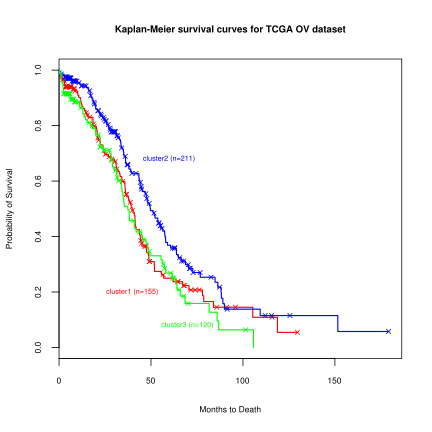

In [10]:
##-- Set up R plot display options in notebook
options(jupyter.plot_mimetypes = "image/svg+xml") 
options(repr.plot.width = 6, repr.plot.height = 6)

##-- add right censoring
table(clinical$vital.status)
clinical$censor = NA
clinical$censor[which(clinical$vital.status == 'LIVING')] = 0
clinical$censor[which(clinical$vital.status == 'DECEASED')] = 1
clinical$censor = as.numeric(clinical$censor)

##-- KM plot 
surv = Surv(clinical$overall.survival.month, clinical$censor)
surv.fit = survfit(surv ~ clinical$cluster)

plot(surv.fit, mark=4, col=c('red','blue','green'), 
     lty=1, lwd=1.5,cex=0.8,cex.lab=0.7, cex.axis=0.7, cex.main=0.8,
     main='Kaplan-Meier survival curves for TCGA OV dataset',
     xlab='Months to Death', 
     ylab='Probability of Survival')
text(40,0.20,  labels=paste0('cluster1 (n=',sample.counts[1,2],')'), 
     cex=0.6, col='red')
text(60,0.68, labels=paste0('cluster2 (n=',sample.counts[2,2],')'), 
     cex=0.6, col='blue')
text(70,0.08, labels=paste0('cluster3 (n=',sample.counts[3,2],')'), 
     cex=0.6, col='green')

##-- log-rank test
print(paste0('Running log-rank test for survival'))
surv = Surv(clinical$overall.survival.month, clinical$censor)
surv.diff = survdiff(surv ~ clinical$cluster)
surv.diff

##-- cox pp haz model (comparing cluster 2 and 3 as an example!)
print(paste0('Running Cox proportional hazards model for survival'))
clinical.sub = clinical[clinical$cluster %in% c(2,3),]
surv = Surv(clinical.sub$overall.survival.month, clinical.sub$censor)

##-- full cox model
print(paste0('(a) Full multivariate cox model for survival'))
coxph(surv~(clinical.sub$cluster + 
              clinical.sub$age.at.diagnosis.year + 
              clinical.sub$tumor.grade))

##-- reduced cox model
print(paste0('(b) Reduced multivariate cox model for survival'))
coxph(surv~(clinical.sub$cluster + clinical.sub$age.at.diagnosis.year))

##-- univariate cox model 
print(paste0('(c) Univariate cox model for survival'))
coxph(surv~(clinical.sub$cluster))


In [11]:
print('Program finished!')
sessionInfo()

[1] "Program finished!"


R version 3.3.1 (2016-06-21)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 14.04.5 LTS

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] NMF_0.20.6                 cluster_2.0.5             
 [3] rngtools_1.2.4             pkgmaker_0.22             
 [5] registry_0.3               survival_2.39-5           
 [7] gplots_3.0.1               IRdisplay_0.4.9000        
 [9] pathview_1.12.0            org.Hs.eg.db_3.3.0        
[11] AnnotationDbi_1.34.4       clusterProfiler_3.0.5     
[13] DOSE_2.10.7                

***

## Summary

In this workshop, we demonstrated how to run RNAseq analysis to identify DEGs & pathways, and how to use expression data to identify patient groups with different clincial outcomes. We introduced the commonly used bioinformatics tools and good-practice approaches. All the analysis were performed on a pre-built machine in AWS EC2 cloud. 

All the class materials will stay open on [GitHub](https://github.com/riyuebao/CRI-Workshop-Nov2016-RNAseq) if you want to practice or use the pipelines and scripts for your own research projects.

Questions? Post on Github or contact Riyue (Sunny) at `rbao AT bsd dot uchicago dot edu`.

<img src='notebook_ext/ipynb_data/assets/Figure21.png', title = 'RNAseq summary', width = 600, height = 600>

***

## Next Session: ChIPseq analysis and Integration of RNAseq & ChIPseq (Kyle Hernandez PhD)